## VGG19 ##

In [1]:
#imports
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, jaccard_score
import seaborn as sns
from tensorflow.keras.models import load_model
import numpy as np

### Data Loading and Transformation ###

In [14]:
#Data load
#load the data from preprocessed data
train_data_dir = 'Preprocessed_Data/train'
test_data_dir = "Preprocessed_Data/test"
img_width, img_height = 224, 224
batch_size = 32
num_classes = 3

In [15]:
# Data Augmentation and Normalization for Training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Normalization for Testing
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [16]:
# Load and Augment Training Data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load Test Data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [17]:
# Data Augmentation and Normalization for Training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Normalization for Testing
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

### Model Architecture ###

In [7]:
#model architecture vgg19
def VGG19():
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    return model

In [8]:
# Create the VGG19 model
vgg19_model = VGG19()

# Display model summary
vgg19_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

### Model Training ###

In [9]:
# Compile the model
vgg19_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

In [10]:
#train vgg19
import tensorflow as tf
epochs = 20
with tf.device('/GPU:0'):  # Specify GPU device
  history_vgg19 = vgg19_model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // batch_size,
      epochs=epochs,
      validation_data=test_generator,
      validation_steps=test_generator.samples // batch_size)

Epoch 1/20
160/160 [==============================] - 1416s 9s/step - loss: 0.8753 - accuracy: 0.6423 - precision: 0.6596 - recall: 0.6118 - val_loss: 0.8503 - val_accuracy: 0.6641 - val_precision: 0.6641 - val_recall: 0.6641
Epoch 2/20
160/160 [==============================] - 106s 660ms/step - loss: 0.8388 - accuracy: 0.6638 - precision: 0.6638 - recall: 0.6638 - val_loss: 0.8342 - val_accuracy: 0.6648 - val_precision: 0.6648 - val_recall: 0.6648
Epoch 3/20
160/160 [==============================] - 107s 668ms/step - loss: 0.8376 - accuracy: 0.6636 - precision: 0.6636 - recall: 0.6636 - val_loss: 0.8395 - val_accuracy: 0.6633 - val_precision: 0.6633 - val_recall: 0.6633
Epoch 4/20
160/160 [==============================] - 107s 664ms/step - loss: 0.8366 - accuracy: 0.6638 - precision: 0.6638 - recall: 0.6638 - val_loss: 0.8336 - val_accuracy: 0.6641 - val_precision: 0.6641 - val_recall: 0.6641
Epoch 5/20
160/160 [==============================] - 106s 663ms/step - loss: 0.8364 - acc

In [11]:
#vgg19_model.save('D:\8th_semester\DL\DL_Project\models\vgg_model')

In [19]:
loaded_vgg19 = load_model(r"D:\8th_semester\DL\DL_Project\models\vgg_model")

### Training Visualization ###

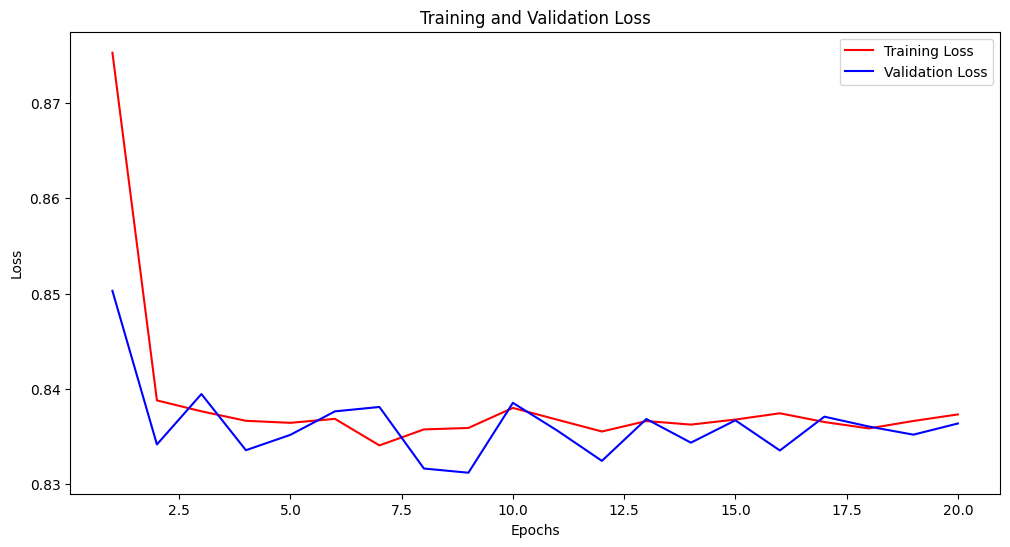

In [13]:
# Retrieve a list of training and validation losses and accuracies
train_loss = history_vgg19.history['loss']
val_loss = history_vgg19.history['val_loss']


# Number of epochs
epochs_range = range(1, epochs + 1)

# Create the plots for training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs_range, train_loss, 'r', label='Training Loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

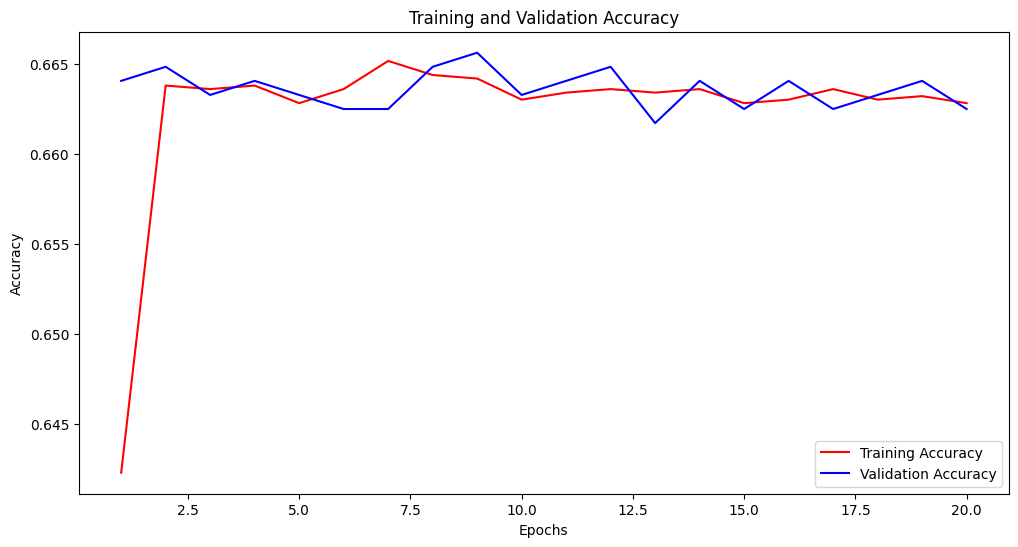

In [14]:
train_accuracy = history_vgg19.history['accuracy']
val_accuracy = history_vgg19.history['val_accuracy']

# Create the plots for training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs_range, train_accuracy, 'r', label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Predict, Test and Evaluate ###

In [21]:
results = loaded_vgg19.evaluate(test_generator)

41/41 [==============================] - 204s 5s/step - loss: 0.8345 - accuracy: 0.6638


In [23]:
# Test the Model
test_loss, test_accuracy= results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict
y_true = test_generator.classes
y_pred = loaded_vgg19.predict(test_generator)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
print("Predicted Classes = " ,y_pred_classes)

#Evaluate the Model
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(confusion_mat)

Test Loss: 0.83450847864151
Test Accuracy: 0.6638198494911194
41/41 [==============================] - 180s 4s/step
Predicted Classes =  [2 2 2 ... 2 2 2]
Classification Report:
               precision    recall  f1-score   support

  COVID19_RGB       0.00      0.00      0.00       116
   Normal_RGB       0.00      0.00      0.00       317
PNEUMONIA_RGB       0.66      1.00      0.80       855

     accuracy                           0.66      1288
    macro avg       0.22      0.33      0.27      1288
 weighted avg       0.44      0.66      0.53      1288

Confusion Matrix:
[[  0   0 116]
 [  0   0 317]
 [  0   0 855]]


C:\Users\MEDHA TRUST\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MEDHA TRUST\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MEDHA TRUST\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [27]:

# Calculate precision, recall, and F1-score for each class
precision, recall, f1_score,_ = precision_recall_fscore_support(y_true, y_pred_classes)

print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("F1-Score for each class:", f1_score)

# Calculate Jaccard Score for each class
jaccard_scores = jaccard_score(y_true, y_pred_classes, average=None)
print("Jaccard Score for each class:", jaccard_scores)

# Calculate Type 1 error and Type 2 error for each class
# Type 1 error (False Positives) - how many times a class was predicted but shouldn't have been
type_1_errors = confusion_mat.sum(axis=0) - np.diag(confusion_mat)  # Column-wise sum minus the diagonal

# Type 2 error (False Negatives) - how many times a class wasn't predicted but should have been
type_2_errors = confusion_mat.sum(axis=1) - np.diag(confusion_mat)  # Row-wise sum minus the diagonal

print("Type 1 Errors for each class:", type_1_errors)
print("Type 2 Errors for each class:", type_2_errors)

Precision for each class: [0.         0.         0.66381988]
Recall for each class: [0. 0. 1.]
F1-Score for each class: [0.        0.        0.7979468]
Jaccard Score for each class: [0.         0.         0.66381988]
Type 1 Errors for each class: [  0   0 433]
Type 2 Errors for each class: [116 317   0]


C:\Users\MEDHA TRUST\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### New Image Prediction ###

In [28]:
#class to index mapping
print("Class Indices:", train_generator.class_indices)

Class Indices: {'COVID19_RGB': 0, 'NORMAL_RGB': 1, 'PNEUMONIA_RGB': 2}


In [35]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
# Load and preprocess the test image
img_path = 'test_image.jpg'  
img_width, img_height = 224, 224 
image = load_img(img_path, target_size=(img_width, img_height)) 
image_array = img_to_array(image)  # Convert the image to an array
image_array = image_array / 255.0  # Normalize the image
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

In [36]:
# Make a prediction
prediction = loaded_vgg19.predict(image_array)

# Get the class with the highest probability
predicted_class = np.argmax(prediction)
print(predicted_class)
if (predicted_class == 0):
    print("COVID 19")
elif(predicted_class == 1):
    print("Normal")
else:
    print("Pneumonia")

1/1 [==============================] - 0s 368ms/step
2
Pneumonia
